# Playback Audio

In [1]:
import numpy as np
import pandas as pd
import simpleaudio as sa
import matplotlib.pyplot as plt
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import tensorflow as tf
import tensorflow_io as tfio


# Build the dataloading structure

### Define file paths

In [2]:
audio_path = (f'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/machined/sound/')
# grass_path = os.path.join(audio_path, 'grass')
gravel_path = os.path.join(audio_path, 'gravel')
indoors_path = os.path.join(audio_path, 'indoors')
leafs_path = os.path.join(audio_path, 'leafs')
snow_path = os.path.join(audio_path, 'snow')



### Build Loading function

In [3]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode the wav contents
    wav, sampleRate = tf.audio.decode_wav(contents = file_contents,
                                          desired_channels= 1)
    # Trailing axis
    wav = tf.squeeze(wav, axis = -1)
    sampleRate = tf.cast(sampleRate, dtype=tf.int64)
    return wav
    


### Create Tensorflow Datasets

In [4]:

grass_audio = tf.data.Dataset.list_files(gravel_path + '/*.wav')
# solid_audio = tf.data.Dataset.list_files(solid_path + '/*.wav')


### Add labels to the clips

In [5]:
labelDict = {
    "snow": 1,
    "grass": 2,
    "leafs": 3,
    "soil" : 4,
    "rocks": 5,
    "solid": 6

}

grass = tf.data.Dataset.zip((grass_audio, tf.data.Dataset.from_tensor_slices(tf.ones(len(grass_audio))*labelDict["grass"])))


# Analyse the Audio data

### Calculate wave cycle length

In [6]:
lengths = []
for file in grass_audio:
    sound_wave = load_wav_16k_mono(file)
    lengths.append(len(sound_wave))


[16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384,
 16384]

In [7]:
# Play audio file
audio_path = glob(f'E:/Bruker/Dokumenter/Skole/Master/smart_paws/data/smallpaw_1/sound/*/*.wav')

# ipd.Audio(audio_path[1])

file_contents = tf.io.read_file(audio_path[1])
# Decode the wav contents
wav, sampleRate = tf.audio.decode_wav(contents = file_contents,
                                        desired_channels= 1)

# Trailing axis
wav = tf.squeeze(wav, axis = -1)
sampleRate = tf.cast(sampleRate, dtype=tf.int64)


In [8]:
sampleRate
    

<tf.Tensor: shape=(), dtype=int64, numpy=16000>

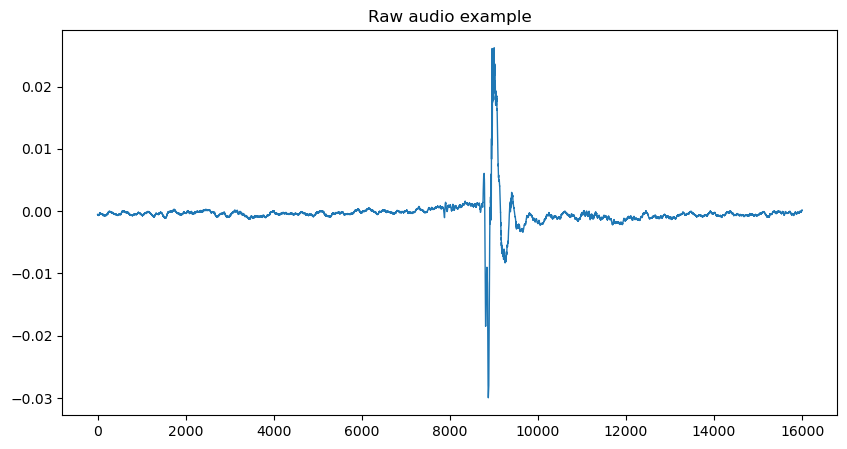

In [9]:



sampleFrequency = 16000

audioData, sampleRate = librosa.load(audio_path[1], mono=True, duration=1.0, sr=sampleFrequency)
audio_int16 = (audioData * 32767).astype(np.int16)
audioData.shape

pd.Series(audioData).plot(figsize=(10,5), 
                            lw=1,
                            title='Raw audio example')

plt.show()


Text(0.5, 1.0, 'Power spectrum')

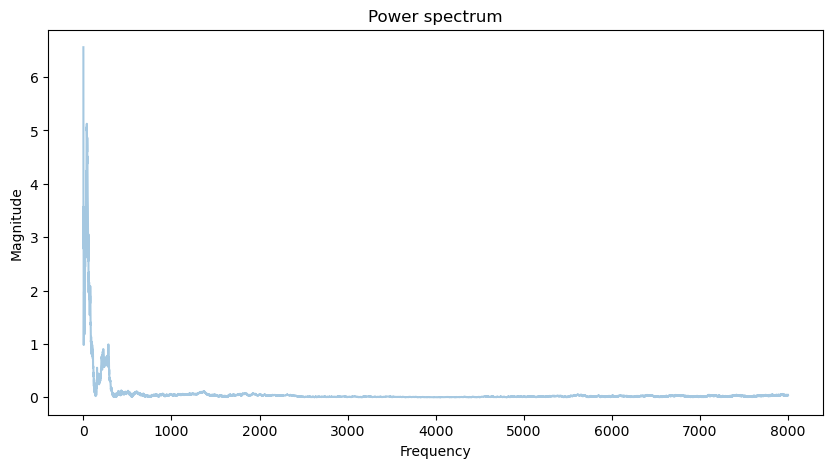

In [10]:
# Plotting the power spectrum

fft = np.fft.fft(audioData)
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sampleRate, len(spectrum))
# take half of the spectrum and frequency as it is a mirror image
half_spectrum = spectrum[:int(len(spectrum)/2)]
half_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=(10,5))
plt.plot(half_f, half_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

8565 9589


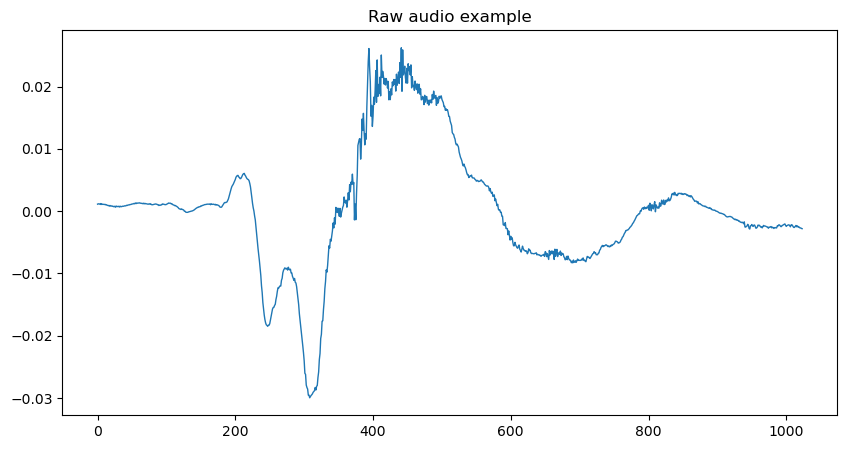

In [19]:

startIndex = 0
endIndex = 16000

for i in range(audioData.shape[0]):
    if np.abs(audioData[i]) > 0.005: 
        startIndex = i - 200
        endIndex = startIndex + 1024
        break

print(startIndex, endIndex)

pd.Series(audioData[startIndex: endIndex]).plot(figsize=(10,5), 
                            lw=1,
                            title='Raw audio example')

plt.show()

In [21]:
# play_obj = sa.play_buffer(audio_int16, num_channels=1, bytes_per_sample=2, sample_rate=sampleFrequency)

# play_obj.wait_done()
audioData.shape

(16000,)

In [22]:
audioSTFT = librosa.stft(audioData, n_fft=512, hop_length=400)
# audioSTFT = librosa.stft(audioData[startIndex: endIndex], n_fft=2048, hop_length=160)
audioSTFT.shape

(257, 41)

In [23]:


audio_db = librosa.amplitude_to_db(np.abs(audioSTFT), ref=np.max)
audio_db.shape


(257, 41)

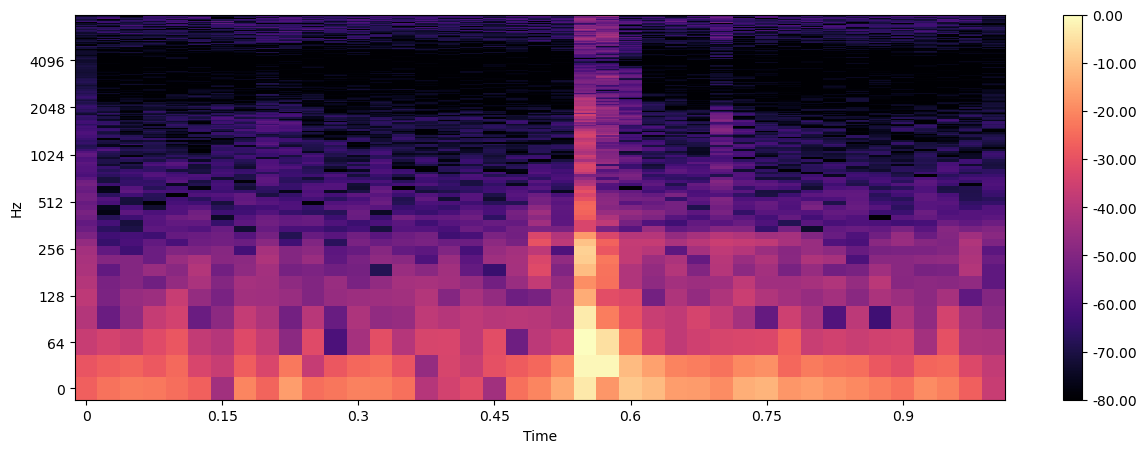

: 

In [27]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(audio_db, x_axis = 'time', y_axis = 'log', ax=ax, sr=sampleFrequency, hop_length=400)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.savefig("spectogram_example.svg")
plt.show()

In [16]:
audioMEL = librosa.feature.mfcc(audioData, sr=16000, n_fft=2048, hop_length=400, n_mfcc=32)


C:\Users\aleks\AppData\Local\Temp\ipykernel_15692\3946360652.py:4: FutureWarning: Pass y=[-0.0005188  -0.00054932 -0.00057983 ...  0.00018311  0.00021362
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audioMEL = librosa.feature.mfcc(audioData, sr=16000, n_fft=2048, hop_length=400, n_mfcc=32)


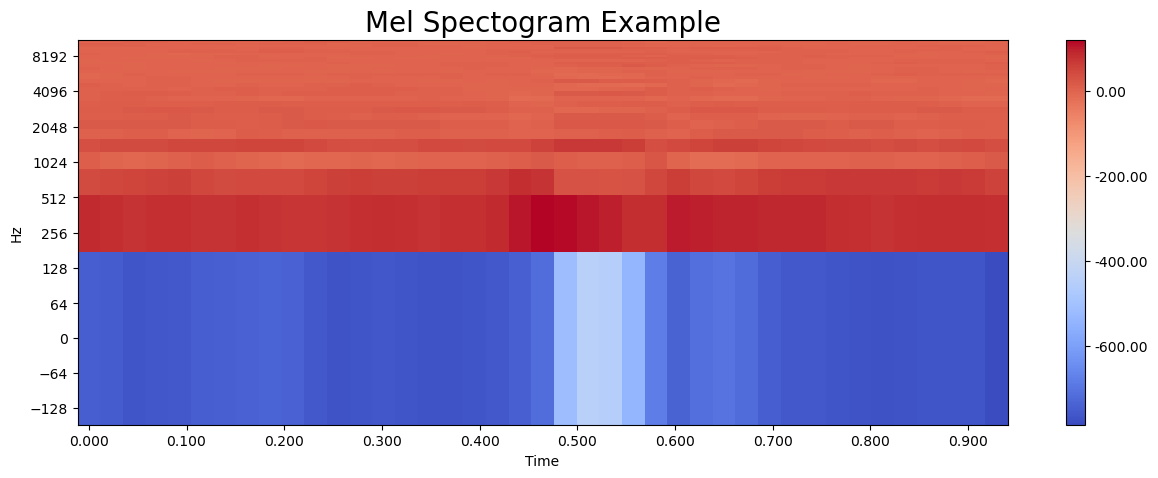

In [17]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(audioMEL, 
                               x_axis = 'time', 
                               y_axis = 'log', 
                               ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()